In [101]:
using XLSX
using DataFrames, TimeSeries
using StatsPlots
using Plots
using LinearAlgebra
using CSV
using StatsBase
using GLM
include("../utils.jl")


print_percentiles (generic function with 3 methods)

In [102]:
columns = [:Date, :USA_Net, :World_ex_USA, :EM_Net, :ACWI_Net_PLN, :MwigTR, :WIG20TR, :B10YPL]
data_df = DataFrame(XLSX.readtable("../data/assets_data_03.24.xlsx", "Indexes_PLN"; infer_eltypes=true))[2:end, columns]
dropmissing!(data_df, disallowmissing=true)
returns_pln = data_df |> 
            x -> TimeArray(x; timestamp = :Date) |> 
            x -> from(x, Date(2002,12,01)) |>
            x -> percentchange(x, :log)

255×7 TimeArray{Float64, 2, Date, Matrix{Float64}} 2003-01-31 to 2024-03-31
┌────────────┬────────────┬──────────────┬─────────────┬──────────────┬─────────
│            │ USA_Net    │ World_ex_USA │ EM_Net      │ ACWI_Net_PLN │ MwigTR ⋯
├────────────┼────────────┼──────────────┼─────────────┼──────────────┼─────────
│ 2003-01-31 │ -0.0248446 │   -0.0388471 │ -0.00442015 │   -0.0317079 │  -0.04 ⋯
│ 2003-02-28 │ -0.0159343 │   -0.0199094 │  -0.0284988 │   0.00510351 │ -0.001 ⋯
│ 2003-03-31 │ 0.00886423 │   -0.0194601 │  -0.0289739 │    0.0430687 │  -0.00 ⋯
│ 2003-04-30 │  0.0798764 │    0.0916379 │   0.0851925 │    0.0118412 │   0.03 ⋯
│ 2003-05-31 │  0.0517369 │    0.0601744 │   0.0690563 │    0.0300993 │   0.05 ⋯
│ 2003-06-30 │   0.011892 │    0.0240024 │   0.0551391 │    0.0670022 │   0.01 ⋯
│ 2003-07-31 │  0.0179915 │    0.0226828 │   0.0603263 │    0.0132941 │    0.1 ⋯
│ 2003-08-31 │  0.0181089 │    0.0254588 │   0.0647735 │    0.0495565 │    0.1 ⋯
│     ⋮      │     ⋮      │      

In [148]:
data_df = DataFrame(XLSX.readtable("../data/assets_data_03.24.xlsx", "Macro_month"; infer_eltypes=true))[:,[:Date, :WIBOR3m, :CPIPLM, :Y10PL, :MWig40_dy]]
dropmissing!(data_df, disallowmissing=true)
macro_pl = data_df |> x -> TimeArray(x; timestamp = :Date)  |> x -> from(x,Date(2003,01,01)) 

204×4 TimeArray{Float64, 2, Date, Matrix{Float64}} 2007-08-31 to 2024-07-31
┌────────────┬─────────┬────────┬─────────┬───────────┐
│            │ WIBOR3m │ CPIPLM │ Y10PL   │ MWig40_dy │
├────────────┼─────────┼────────┼─────────┼───────────┤
│ 2007-08-31 │  0.0503 │ -0.004 │ 0.05789 │   0.00668 │
│ 2007-09-30 │   0.051 │  0.008 │   0.057 │   0.00778 │
│ 2007-10-31 │  0.0521 │  0.006 │ 0.05514 │   0.00775 │
│ 2007-11-30 │  0.0556 │  0.007 │ 0.05777 │    0.0093 │
│ 2007-12-31 │   0.057 │  0.003 │ 0.05916 │    0.0095 │
│ 2008-01-31 │  0.0565 │  0.007 │ 0.05688 │     0.011 │
│ 2008-02-29 │  0.0594 │  0.004 │ 0.05973 │    0.0118 │
│ 2008-03-31 │  0.0615 │  0.004 │ 0.05971 │    0.0188 │
│     ⋮      │    ⋮    │   ⋮    │    ⋮    │     ⋮     │
│ 2024-01-31 │  0.0586 │  0.004 │ 0.05226 │   0.02643 │
│ 2024-02-29 │  0.0586 │  0.003 │ 0.05312 │   0.03451 │
│ 2024-03-31 │  0.0588 │  0.002 │ 0.05432 │   0.03081 │
│ 2024-04-30 │  0.0586 │  0.011 │ 0.05712 │   0.03272 │
│ 2024-05-31 │  0.0585 │  0.

In [149]:
columns = [:Date, :USA_Net, :World_ex_USA, :EM_Net]
data_df = DataFrame(XLSX.readtable("../data/assets_data_03.24.xlsx", "Indexes"; infer_eltypes=true))[2:end, columns]
dropmissing!(data_df, disallowmissing=true)
returns_usd = data_df |> 
            x -> TimeArray(x; timestamp = :Date) |> 
            x -> percentchange(x, :log)

435×3 TimeArray{Float64, 2, Date, Matrix{Float64}} 1988-01-31 to 2024-03-31
┌────────────┬────────────┬──────────────┬─────────────┐
│            │ USA_Net    │ World_ex_USA │ EM_Net      │
├────────────┼────────────┼──────────────┼─────────────┤
│ 1988-01-31 │  0.0410122 │    0.0153553 │   0.0935834 │
│ 1988-02-29 │  0.0401109 │    0.0640862 │   0.0031132 │
│ 1988-03-31 │ -0.0349774 │    0.0592025 │     0.10175 │
│ 1988-04-30 │ 0.00818061 │    0.0140195 │   0.0517417 │
│ 1988-05-31 │ 0.00760205 │   -0.0326806 │   0.0292525 │
│ 1988-06-30 │  0.0445733 │   -0.0229028 │   0.0331365 │
│ 1988-07-31 │ -0.0040323 │    0.0288082 │  -0.0260317 │
│ 1988-08-31 │  -0.035096 │   -0.0667177 │  -0.0274362 │
│     ⋮      │     ⋮      │      ⋮       │      ⋮      │
│ 2023-09-30 │ -0.0483353 │   -0.0342956 │  -0.0264995 │
│ 2023-10-31 │ -0.0235616 │   -0.0431263 │   -0.039629 │
│ 2023-11-30 │  0.0895259 │    0.0898198 │   0.0769883 │
│ 2023-12-31 │  0.0456572 │    0.0532219 │   0.0383487 │
│ 2024-01-31

In [150]:
returns_summarystats(returns_pln, 12)

,std,max,mean,p75th,min,skewness,p25th,autocor,kurtosis,sr,median
USA_Net,0.1494,1.4788,0.0985,0.4065,-2.257,-0.7909,-0.1905,0.0391,1.8967,0.6593,0.1537
World_ex_USA,0.168,1.7129,0.0702,0.3971,-2.7986,-0.8513,-0.2294,0.1307,2.6166,0.4181,0.1466
EM_Net,0.2087,1.893,0.0842,0.553,-3.8371,-0.8236,-0.3169,0.1393,3.2059,0.4033,0.0995
ACWI_Net_PLN,0.121,1.2714,0.0879,0.3596,-1.2476,-0.3241,-0.1698,0.0111,0.6767,0.7263,0.0957
MwigTR,0.2181,2.403,0.1155,0.4835,-3.8898,-0.6628,-0.2993,0.1952,3.7443,0.5296,0.1475
WIG20TR,0.2199,2.2594,0.0705,0.594,-3.2019,-0.3645,-0.4047,0.0087,1.0945,0.3205,0.1144
B10YPL,0.0895,1.5024,0.0444,0.206,-1.0138,0.0388,-0.1158,0.0204,3.1919,0.4963,0.0604


In [151]:
returns_summarystats(returns_usd,12)

,std,max,mean,p75th,min,skewness,p25th,autocor,kurtosis,sr,median
USA_Net,0.1491,1.4788,0.1,0.4254,-2.257,-0.7009,-0.2004,0.0014,1.3793,0.6706,0.1537
World_ex_USA,0.1682,1.7129,0.0543,0.4165,-2.7986,-0.6171,-0.2752,0.0571,1.6003,0.323,0.0992
EM_Net,0.2239,2.0825,0.0877,0.5565,-4.1,-0.8932,-0.3138,0.1422,3.1066,0.3914,0.1224


In [152]:
ols = lm(@formula(USA_Net ~ MwigTR), returns_pln)
println(ols)
println(r2(ols))

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

USA_Net ~ 1 + MwigTR

Coefficients:
─────────────────────────────────────────────────────────────────────────────
                  Coef.  Std. Error      t  Pr(>|t|)    Lower 95%   Upper 95%
─────────────────────────────────────────────────────────────────────────────
(Intercept)  0.00367412  0.00198719   1.85    0.0656  -0.00023942  0.00758766
MwigTR       0.470963    0.0312627   15.06    <1e-36   0.409395    0.532531
─────────────────────────────────────────────────────────────────────────────
0.47285673857874355


In [153]:
ols = lm(@formula(MwigTR ~ USA_Net), returns_pln)
println(ols)
println(r2(ols))

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

MwigTR ~ 1 + USA_Net

Coefficients:
─────────────────────────────────────────────────────────────────────────────
                  Coef.  Std. Error      t  Pr(>|t|)    Lower 95%   Upper 95%
─────────────────────────────────────────────────────────────────────────────
(Intercept)  0.00138433   0.0029197   0.47    0.6358  -0.00436569  0.00713434
USA_Net      1.00402      0.0666472  15.06    <1e-36   0.872767    1.13528
─────────────────────────────────────────────────────────────────────────────
0.4728567385787438


In [154]:
returns_lag = merge(returns_pln, TimeSeries.lead(returns_pln,1))
ols = lm(@formula(MwigTR ~  USA_Net_1 + USA_Net), returns_lag)
println(ols)
println(r2(ols))

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

MwigTR ~ 1 + USA_Net_1 + USA_Net

Coefficients:
──────────────────────────────────────────────────────────────────────────────
                   Coef.  Std. Error      t  Pr(>|t|)    Lower 95%   Upper 95%
──────────────────────────────────────────────────────────────────────────────
(Intercept)  0.000574091  0.00296783   0.19    0.8468  -0.00527092  0.00641911
USA_Net_1    0.10924      0.0666639    1.64    0.1025  -0.0220515   0.240532
USA_Net      1.00065      0.0666232   15.02    <1e-36   0.869436    1.13186
──────────────────────────────────────────────────────────────────────────────
0.47876745733429493


In [155]:
ols = lm(@formula(World_ex_USA ~ MwigTR), returns_pln)
println(ols)
println(r2(ols))

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

World_ex_USA ~ 1 + MwigTR

Coefficients:
──────────────────────────────────────────────────────────────────────────────
                   Coef.  Std. Error      t  Pr(>|t|)    Lower 95%   Upper 95%
──────────────────────────────────────────────────────────────────────────────
(Intercept)  0.000606901  0.00217528   0.28    0.7805  -0.00367706  0.00489086
MwigTR       0.54516      0.0342217   15.93    <1e-39   0.477764    0.612555
──────────────────────────────────────────────────────────────────────────────
0.5007618342522057


In [156]:
ols = lm(@formula(EM_Net ~ MwigTR), returns_pln)
println(ols)
println(r2(ols))

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

EM_Net ~ 1 + MwigTR

Coefficients:
──────────────────────────────────────────────────────────────────────────────
                   Coef.  Std. Error      t  Pr(>|t|)    Lower 95%   Upper 95%
──────────────────────────────────────────────────────────────────────────────
(Intercept)  0.000975548  0.00288701   0.34    0.7357  -0.00471008  0.00666118
MwigTR       0.627412     0.0454187   13.81    <1e-31   0.537966    0.716859
──────────────────────────────────────────────────────────────────────────────
0.42995612230004543


In [157]:
columns = [:Date, :USA_Net, :World_ex_USA, :EM_Net]
data_df = DataFrame(XLSX.readtable("../data/assets_data_03.24.xlsx", "Indexes"; infer_eltypes=true))[2:end, columns]
dropmissing!(data_df, disallowmissing=true)
returns_usd = data_df |> 
            x -> TimeArray(x; timestamp = :Date) |> 
            x -> percentchange(x, :log)

435×3 TimeArray{Float64, 2, Date, Matrix{Float64}} 1988-01-31 to 2024-03-31
┌────────────┬────────────┬──────────────┬─────────────┐
│            │ USA_Net    │ World_ex_USA │ EM_Net      │
├────────────┼────────────┼──────────────┼─────────────┤
│ 1988-01-31 │  0.0410122 │    0.0153553 │   0.0935834 │
│ 1988-02-29 │  0.0401109 │    0.0640862 │   0.0031132 │
│ 1988-03-31 │ -0.0349774 │    0.0592025 │     0.10175 │
│ 1988-04-30 │ 0.00818061 │    0.0140195 │   0.0517417 │
│ 1988-05-31 │ 0.00760205 │   -0.0326806 │   0.0292525 │
│ 1988-06-30 │  0.0445733 │   -0.0229028 │   0.0331365 │
│ 1988-07-31 │ -0.0040323 │    0.0288082 │  -0.0260317 │
│ 1988-08-31 │  -0.035096 │   -0.0667177 │  -0.0274362 │
│     ⋮      │     ⋮      │      ⋮       │      ⋮      │
│ 2023-09-30 │ -0.0483353 │   -0.0342956 │  -0.0264995 │
│ 2023-10-31 │ -0.0235616 │   -0.0431263 │   -0.039629 │
│ 2023-11-30 │  0.0895259 │    0.0898198 │   0.0769883 │
│ 2023-12-31 │  0.0456572 │    0.0532219 │   0.0383487 │
│ 2024-01-31

In [158]:
data = merge(returns_pln[:MwigTR], returns_usd[:USA_Net])
ols = lm(@formula(USA_Net ~ MwigTR), data)
println(ols)
println(r2(ols))

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

USA_Net ~ 1 + MwigTR

Coefficients:
─────────────────────────────────────────────────────────────────────────────
                  Coef.  Std. Error      t  Pr(>|t|)    Lower 95%   Upper 95%
─────────────────────────────────────────────────────────────────────────────
(Intercept)  0.00367412  0.00198719   1.85    0.0656  -0.00023942  0.00758766
MwigTR       0.470963    0.0312627   15.06    <1e-36   0.409395    0.532531
─────────────────────────────────────────────────────────────────────────────
0.47285673857874166


In [159]:
# number of month wig20 > mwig40

n_wig20Gr = values(returns_pln[:WIG20TR] .> returns_pln[:MwigTR])  |> count
n_wig20Gr / length(returns_pln)


0.47058823529411764

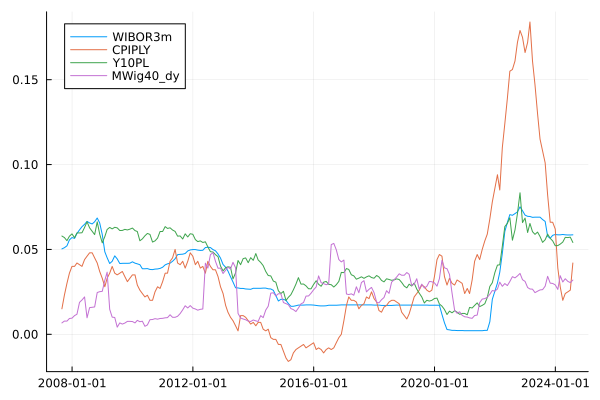

In [172]:
plot(rf)

In [161]:
bond_excess = returns_pln[:B10YPL] .- rf ./ 23 |>
    x -> from(x, Date(2015,01,01)) |>
    x -> to(x,  Date(2019,12,31)) 

returns_summarystats(bond_excess,12)

,std,max,mean,p75th,min,skewness,p25th,autocor,kurtosis,sr,median
B10YPL_WIBOR3m,0.0605,0.5817,0.0274,0.1466,-0.5147,-0.0055,-0.1419,0.1196,0.0534,0.4531,0.0524
B10YPL_CPIPLY,0.0601,0.5994,0.0318,0.1599,-0.5056,0.0422,-0.1362,0.1058,0.1058,0.528,0.056
B10YPL_Y10PL,0.0607,0.5817,0.0209,0.1406,-0.5247,0.0048,-0.1496,0.1201,0.0896,0.3444,0.0448
B10YPL_MWig40_dy,0.0605,0.5827,0.0216,0.1364,-0.5279,0.0121,-0.1424,0.121,0.1081,0.3563,0.0414


In [173]:
variables= merge(returns_pln[:USA_Net, :MwigTR], TimeSeries.lead(returns_pln[:USA_Net, :MwigTR]), macro_pl[:WIBOR3m, :CPIPLM, :MWig40_dy], TimeSeries.lead(macro_pl[:WIBOR3m, :CPIPLM, :MWig40_dy], 1), log.(TimeSeries.lead(macro_pl[:MWig40_dy],1)))
colnames(variables)

11-element Vector{Symbol}:
 :USA_Net
 :MwigTR
 :USA_Net_1
 :MwigTR_1
 :WIBOR3m
 :CPIPLM
 :MWig40_dy
 :WIBOR3m_1
 :CPIPLM_1
 :MWig40_dy_1
 :MWig40_dy_2

In [174]:
ols = lm(@formula(MwigTR ~ MWig40_dy_1), variables)
println(ols)
println(r2(ols))

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

MwigTR ~ 1 + MWig40_dy_1

Coefficients:
────────────────────────────────────────────────────────────────────────────
                  Coef.  Std. Error      t  Pr(>|t|)    Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────────
(Intercept)   0.0156113  0.00978799   1.59    0.1123  -0.00369137   0.034914
MWig40_dy_1  -0.543517   0.385743    -1.41    0.1604  -1.30423      0.217199
────────────────────────────────────────────────────────────────────────────
0.009977192877162144


In [175]:
ols = lm(@formula(MwigTR ~ MWig40_dy_2), variables)
println(ols)
println(r2(ols))

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

MwigTR ~ 1 + MWig40_dy_2

Coefficients:
─────────────────────────────────────────────────────────────────────────────
                  Coef.  Std. Error      t  Pr(>|t|)   Lower 95%    Upper 95%
─────────────────────────────────────────────────────────────────────────────
(Intercept)  -0.0517075  0.0299636   -1.73    0.0860  -0.110798   0.00738299
MWig40_dy_2  -0.0139799  0.00754005  -1.85    0.0652  -0.0288495  0.000889673
─────────────────────────────────────────────────────────────────────────────
0.0171506453904694


In [182]:
ols = lm(@formula(MwigTR ~ MWig40_dy_1 + WIBOR3m_1 + CPIPLM_1), variables)
println(ols)
println(r2(ols))

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

MwigTR ~ 1 + MWig40_dy_1 + WIBOR3m_1 + CPIPLM_1

Coefficients:
─────────────────────────────────────────────────────────────────────────────
                  Coef.  Std. Error      t  Pr(>|t|)    Lower 95%   Upper 95%
─────────────────────────────────────────────────────────────────────────────
(Intercept)   0.0327325    0.012211   2.68    0.0080   0.00864989   0.0568152
MWig40_dy_1  -0.571674     0.38275   -1.49    0.1369  -1.32654      0.183187
WIBOR3m_1    -0.466034     0.221212  -2.11    0.0364  -0.90231     -0.029758
CPIPLM_1     -0.314899     0.86867   -0.36    0.7174  -2.02809      1.3983
─────────────────────────────────────────────────────────────────────────────
0.03658709151918704


In [183]:
ols = lm(@formula(MwigTR ~ MWig40_dy + WIBOR3m + CPIPLM), variables)
println(ols)
println(r2(ols))

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

MwigTR ~ 1 + MWig40_dy + WIBOR3m + CPIPLM

Coefficients:
─────────────────────────────────────────────────────────────────────────────
                  Coef.  Std. Error      t  Pr(>|t|)    Lower 95%   Upper 95%
─────────────────────────────────────────────────────────────────────────────
(Intercept)   0.0256318   0.0122461   2.09    0.0376   0.00147998   0.0497837
MWig40_dy    -0.270922    0.382717   -0.71    0.4799  -1.02572      0.483875
WIBOR3m      -0.539226    0.222151   -2.43    0.0161  -0.977353    -0.101098
CPIPLM        0.574589    0.866285    0.66    0.5079  -1.1339       2.28308
─────────────────────────────────────────────────────────────────────────────
0.03097387311577282


In [184]:
ols = lm(@formula(MwigTR ~ USA_Net_1 + MwigTR_1 + MWig40_dy_2 + WIBOR3m_1 + CPIPLM_1), variables)
println(ols)
println(r2(ols))

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

MwigTR ~ 1 + USA_Net_1 + MwigTR_1 + MWig40_dy_2 + WIBOR3m_1 + CPIPLM_1

Coefficients:
────────────────────────────────────────────────────────────────────────────
                  Coef.  Std. Error      t  Pr(>|t|)   Lower 95%   Upper 95%
────────────────────────────────────────────────────────────────────────────
(Intercept)  -0.0346504  0.0301111   -1.15    0.2513  -0.0940394  0.0247386
USA_Net_1    -0.0304893  0.140162    -0.22    0.8280  -0.306936   0.245958
MwigTR_1      0.174875   0.107637     1.62    0.1059  -0.0374199  0.387171
MWig40_dy_2  -0.0131805  0.00746876  -1.76    0.0792  -0.0279114  0.00155035
WIBOR3m_1    -0.399705   0.222369    -1.80    0.0738  -0.838291   0.0388811
CPIPLM_1     -0.330082   0.860421    -0.38    0.7017  -2.02712    1.36695
───────────────────────────────────────────────────

In [185]:
ols = lm(@formula(MwigTR ~ USA_Net + MwigTR_1 + MWig40_dy_2 + WIBOR3m_1 + CPIPLM_1), variables)
println(ols)
println(r2(ols))

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

MwigTR ~ 1 + USA_Net + MwigTR_1 + MWig40_dy_2 + WIBOR3m_1 + CPIPLM_1

Coefficients:
─────────────────────────────────────────────────────────────────────────────
                   Coef.  Std. Error      t  Pr(>|t|)   Lower 95%   Upper 95%
─────────────────────────────────────────────────────────────────────────────
(Intercept)  -0.0140989   0.0201025   -0.70    0.4839  -0.0537476  0.0255499
USA_Net       0.965148    0.0620622   15.55    <1e-35   0.842741   1.08756
MwigTR_1      0.0923321   0.0474144    1.95    0.0529  -0.0011849  0.185849
MWig40_dy_2  -0.00337822  0.00501511  -0.67    0.5014  -0.0132697  0.00651324
WIBOR3m_1    -0.0927857   0.14922     -0.62    0.5348  -0.387097   0.201526
CPIPLM_1     -0.134408    0.573408    -0.23    0.8149  -1.26536    0.996543
─────────────────────────────────────────────

In [186]:
ols = lm(@formula(MwigTR ~ USA_Net + MwigTR_1 + MWig40_dy_2 + WIBOR3m + CPIPLM), variables)
println(ols)
println(r2(ols))

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

MwigTR ~ 1 + USA_Net + MwigTR_1 + MWig40_dy_2 + WIBOR3m + CPIPLM

Coefficients:
───────────────────────────────────────────────────────────────────────────────
                   Coef.  Std. Error      t  Pr(>|t|)     Lower 95%   Upper 95%
───────────────────────────────────────────────────────────────────────────────
(Intercept)  -0.0149977   0.0201186   -0.75    0.4569  -0.0546783    0.0246828
USA_Net       0.96351     0.0621295   15.51    <1e-35   0.84097      1.08605
MwigTR_1      0.0934285   0.0472891    1.98    0.0496   0.000158668  0.186698
MWig40_dy_2  -0.00354078  0.00500684  -0.71    0.4803  -0.0134159    0.00633437
WIBOR3m      -0.125906    0.1489      -0.85    0.3988  -0.419587     0.167775
CPIPLM        0.324445    0.569833     0.57    0.5698  -0.799454     1.44834
────────────────────────────────

In [190]:
ols = lm(@formula(MwigTR ~ MwigTR_1), variables)
println(ols)
println(r2(ols))

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

MwigTR ~ 1 + MwigTR_1

Coefficients:
───────────────────────────────────────────────────────────────────────────
                  Coef.  Std. Error     t  Pr(>|t|)    Lower 95%  Upper 95%
───────────────────────────────────────────────────────────────────────────
(Intercept)  0.00257948  0.00430802  0.60    0.5500  -0.00591626  0.0110752
MwigTR_1     0.188414    0.0701444   2.69    0.0078   0.0500837   0.326744
───────────────────────────────────────────────────────────────────────────
0.0353307523248787


In [189]:
round.(cor(values(variables[:MwigTR, :USA_Net, :WIBOR3m, :CPIPLM, :MWig40_dy])), digits=2)

5×5 Matrix{Float64}:
  1.0    0.76  -0.16   0.0   -0.04
  0.76   1.0   -0.16  -0.01  -0.07
 -0.16  -0.16   1.0    0.27  -0.05
  0.0   -0.01   0.27   1.0    0.02
 -0.04  -0.07  -0.05   0.02   1.0